In [11]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse
from ipywidgets import interact, IntSlider
%matplotlib inline

In [12]:
data = pd.read_csv("zuerichMonthlySunspot.csv")
data.drop(columns=['Unnamed: 0'],inplace=True)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

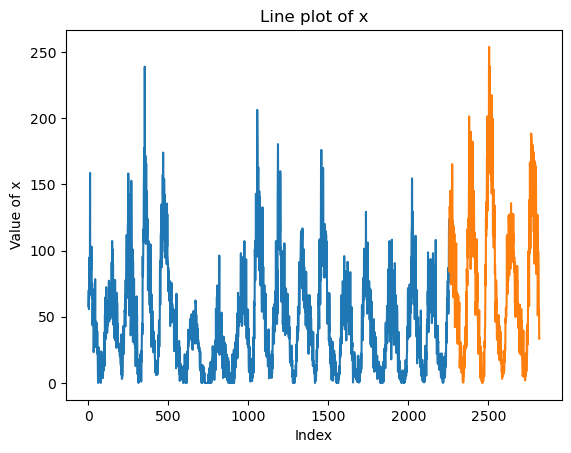

In [13]:
plt.plot(train_data)
plt.plot(test_data)
plt.xlabel('Index')
plt.ylabel('Value of x')
plt.title('Line plot of x')
plt.show()

ar1 = ARIMA(train_data, order=(1, 0, 0))
ar1_fit = ar1.fit()
ar1_lin = ar1_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
ar1_rmse = rmse(ar1_lin, test_data)

p_slider = IntSlider(min=0, max=5, step=1, value=1, description='p:')
d_slider = IntSlider(min=0, max=5, step=1, value=0, description='d:')
q_slider = IntSlider(min=0, max=5, step=1, value=0, description='q:')

@interact(p=p_slider, d=d_slider, q=q_slider)
def run_arima(p, d, q):
    arima = ARIMA(train_data, order=(p, d, q))
    arima_fit = arima.fit()
    arima_lin = arima_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)
    arima_rmse = rmse(arima_lin, test_data)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.plot(arima_lin, label='Predicted Values')
    ax1.plot(test_data, label='Test Values')
    ax1.legend()
    ax2.bar('RMSE', arima_rmse)
    plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.567668
p-value: 0.000000


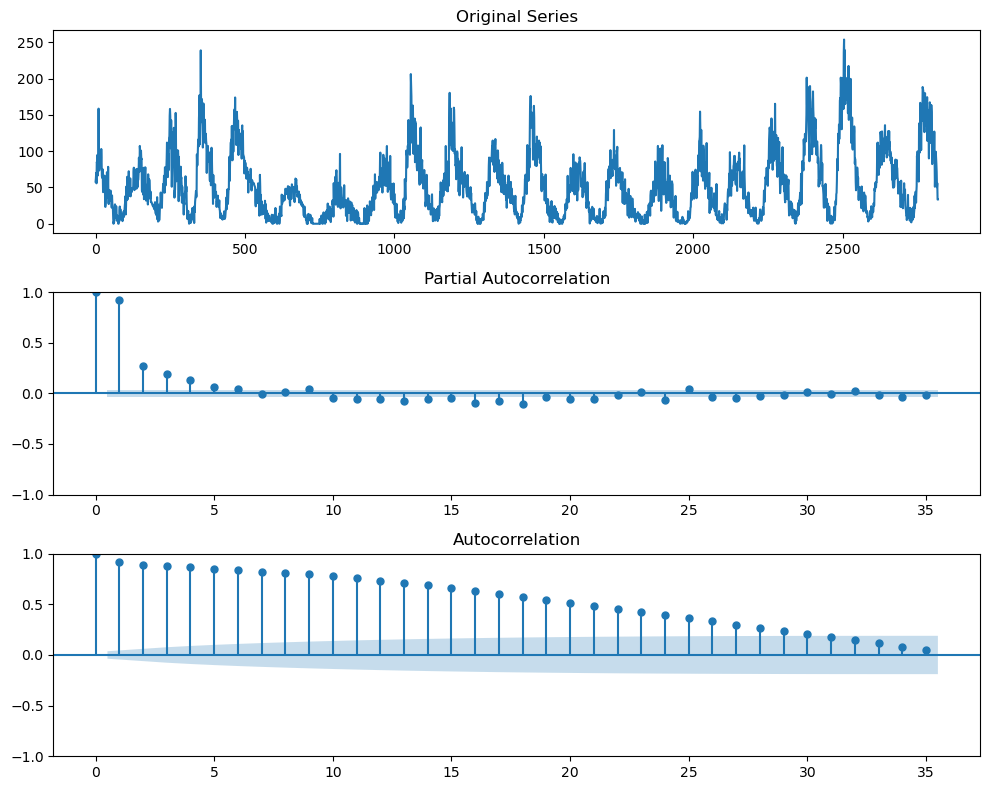

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 1, figsize=(10,8))
axes[0].plot(data); axes[0].set_title('Original Series')
plot_pacf(data, ax=axes[1], method='ywm')
plot_acf(data, ax=axes[2], lags=35)
plt.tight_layout()
plt.show()

## ARIMA

In [16]:
# 1,1,2 ARIMA Model
model = ARIMA(data, order=(1,0,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                 2820
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -11775.692
Date:                Thu, 16 Feb 2023   AIC                          23561.385
Time:                        13:47:00   BIC                          23591.107
Sample:                             0   HQIC                         23572.109
                               - 2820                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.2664     10.610      4.832      0.000      30.470      72.062
ar.L1          0.9827      0.004    278.677      0.000       0.976       0.990
ma.L1         -0.4004      0.015    -27.387      0.0

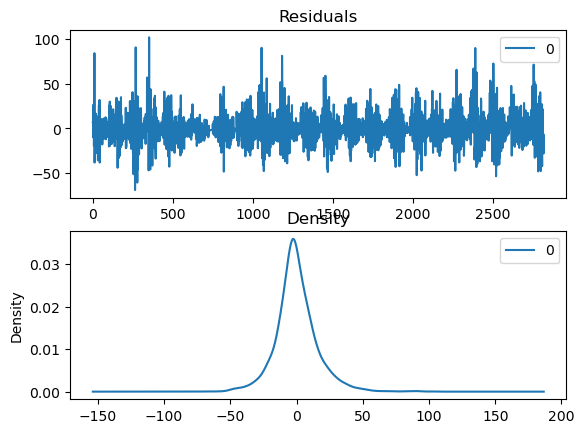

In [17]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(2,1)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

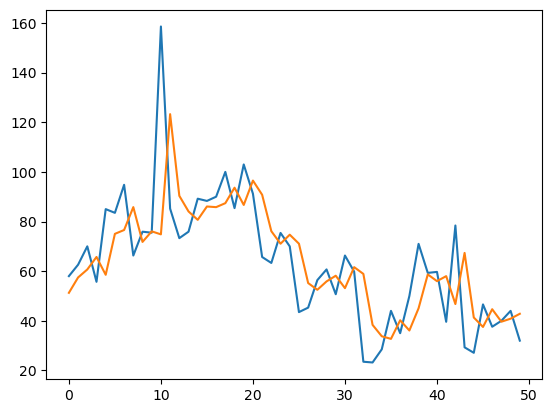

In [18]:
# Actual vs Fitted
prediction = model_fit.predict(dynamic=False)
plt.plot(data[0:50])
plt.plot(prediction[0:50])
plt.show()

## In-Sample forecast

In [10]:
print('\t ARIMA MODEL : In- Sample Forecasting \n')

history = [x for x in train_data['x']]
predictions = []

for t in range(len(test_data)):
    
    model = ARIMA(history, order=(1,0,2))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test_data[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

	 ARIMA MODEL : In- Sample Forecasting 



KeyError: 0

In [ ]:
output = model_fit.forecast()
yhat = output[0]
yhat

In [ ]:
print('\t ARIMA MODEL : In- Sample Forecasting \n')

history = [x for x in train_data['x']]
test = [x for x in test_data['x']]
predictions = []

for t in range(len(test)):
    
    model = ARIMA(history, order=(1,0,2))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

In [ ]:
predictions_series = pd.Series(predictions, index = test_data.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(test_data[-30:], label = 'Expected Values')
plt.plot(predictions_series[-30:], 
         label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [ ]:
error = rmse(test, predictions)
print('Test RMSE: %.4f' % error)

primerjava predikcije 1 al 2 točk v prihodnost

In [ ]:
model = ARIMA(history[:-1], order=(1,0,2))
model_fit = model.fit()
model_fit.forecast()[0]

In [ ]:
model = ARIMA(history[:-2], order=(1,0,2))
model_fit = model.fit()
model_fit.forecast(steps=2)[1]

Out sample je brezveze za arimo kern je ravna crta

# SARIMA

In [19]:
my_order = (1,0,2)
my_seasonal_order = (1, 0, 1, 12)

In [20]:
data_seas=data.diff(12)
data_seas.dropna()

,x
12,15.3
13,13.3
14,19.2
15,32.6
16,5.0
...,...
2815,-35.8
2816,-68.5
2817,-38.9
2818,-64.8


In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data['x'],order = (1,0,2),seasonal_order = (0,1,1,12))
model_fit = model.fit()

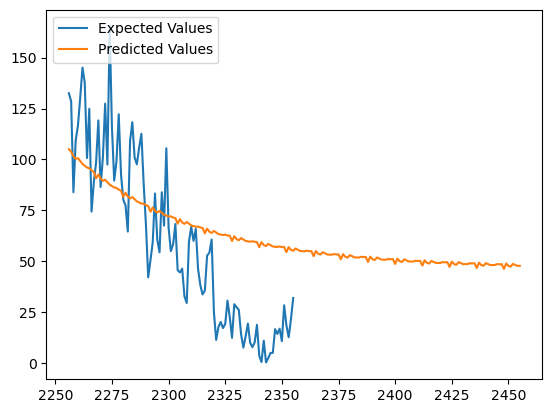

In [22]:
predictions = model_fit.forecast(steps=200)
plt.subplot(1,1,1)
plt.plot(test_data[:100], label = 'Expected Values')
plt.plot(predictions, 
         label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()